In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# import the data
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
full_data = pd.concat([train_df, test])

In [102]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
train_df.info()
print('----------------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                 

In [104]:
#Output Variable : Item_Outlet_Sales             

In [105]:
# Summarize missing values
print('Null values by variable:')
print('----------------------------------')
train_df.isnull().any() 

Null values by variable:
----------------------------------


Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [106]:
# As we obersved above, there are NaN values for two variables

In [107]:
train_df.shape

(8523, 12)

In [108]:
test.shape

(5681, 11)

In [123]:
#Get the first two characters of ID:
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [110]:
# change the catagories of low fat
print('Actual catagories')
print('\n', train_df['Item_Fat_Content'].value_counts())
print('\n Modified Catagories')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                                    'reg' : 'Regular',
                                                                    'low fat' : 'Low Fat' }) 
train_df['Item_Fat_Content'].value_counts()

Actual catagories

 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 Modified Catagories


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [111]:
#Mark non-consumables as separate category in low_fat:
train_df.loc[train_df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [112]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [113]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [114]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [115]:
#year
train_df['Outlet_Year'] = 2013 - train_df['Outlet_Establishment_Year'] 
train_df['Outlet_Year'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Year, dtype: float64

In [116]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [90]:
#train_df['Outlet_Size'].fillna('Missing', inplace=True)

In [91]:
#train_df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [117]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [118]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [119]:
# filling the missing the data
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna('missing')
test['Outlet_Size'] = test['Outlet_Size'].fillna('missing')

In [120]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean()) # Impute missing Item_Weight values with mean
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean()) # Impute missing Item_Weight values with mean

In [121]:
print('Null values by variable:')
print('----------------------------------')
test.isnull().any() 

Null values by variable:
----------------------------------


Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [122]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
train_df['Outlet'] = le.fit_transform(train_df['Outlet_Identifier'])

In [124]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train_df[i] = le.fit_transform(train_df[i])

In [125]:
#One Hot Coding:
train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [126]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Year                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [127]:
train_df[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [ ]:
#Exploring Data

In [128]:
#Drop the columns which have been converted to different types:
train_df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = train_df.loc[train_df['source']=="train"]
test = train_df.loc[train_df['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

KeyError: 'source'

In [23]:
# Viusalization

In [24]:
# Catagory

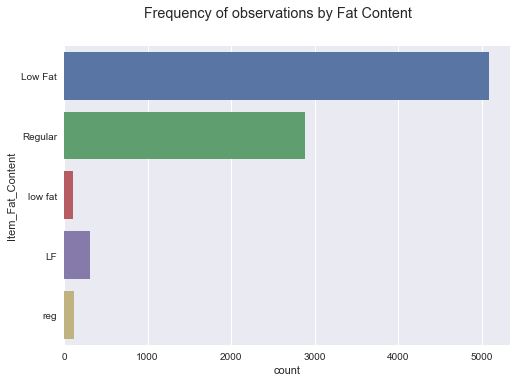

In [24]:
sns.countplot(y='Item_Fat_Content', data = train_df)
plt.suptitle('Frequency of observations by Fat Content ')
plt.show()

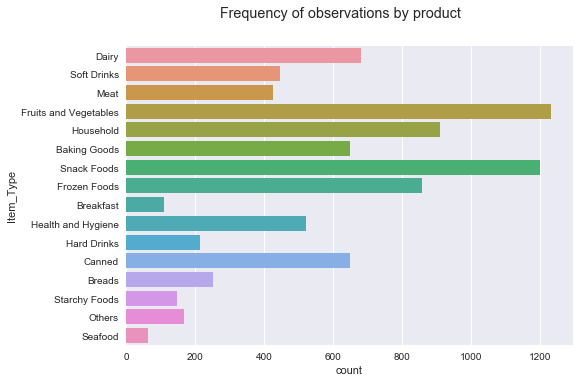

In [25]:
sns.countplot(y='Item_Type', data = train_df)
plt.suptitle('Frequency of observations by product ')
plt.show()

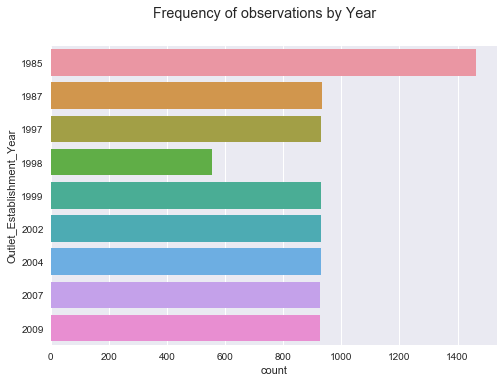

In [26]:
sns.countplot(y='Outlet_Establishment_Year', data = train_df)
plt.suptitle('Frequency of observations by Year ')
plt.show()

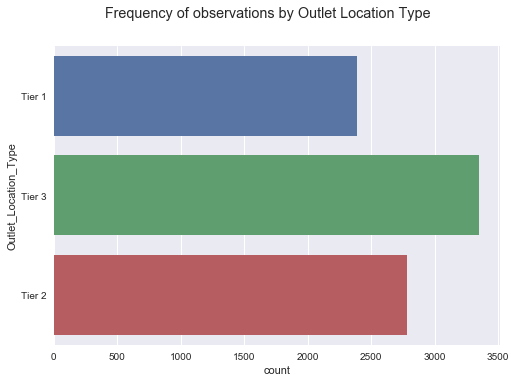

In [27]:
sns.countplot(y='Outlet_Location_Type', data = train_df)
plt.suptitle('Frequency of observations by Outlet Location Type ')
plt.show()

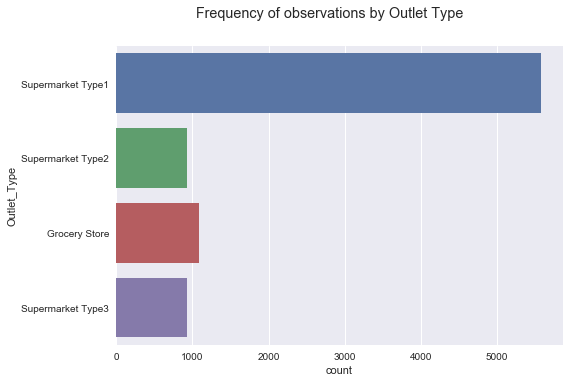

In [28]:
sns.countplot(y='Outlet_Type', data = train_df)
plt.suptitle('Frequency of observations by Outlet Type ')
plt.show()

In [29]:
train_df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [30]:
train_df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

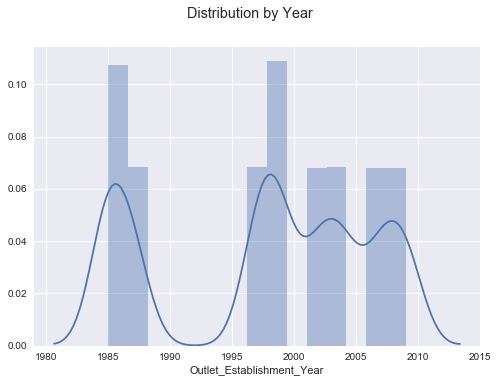

In [32]:
#sns distplot function combines matplotlib hist() function with sns kdeplot() function.
sns.distplot(train_df['Outlet_Establishment_Year'])
plt.suptitle('Distribution by Year')
plt.show()

In [ ]:
#sns.swarmplot('Item_Outlet_Sales', data=train_df)
#plt.show()

In [34]:
full_data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    417
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64